# Amazon Sales Analysis: Data-Driven Product Launch Strategy

## Executive Summary

This analysis of over 110,000 successful Amazon orders identifies key trends to inform a successful new product launch. The core insight is a market split between high-volume, low-price items and low-volume, high-price premium items. The most significant finding is that **"Sets"** are the dominant category, generating ₹35.7M in revenue—nearly double the next category—due to a high average selling price of ₹835.

**Key Findings:**
- The most common order amount is **₹399**, indicating a strong market for impulse or mid-range purchases.
- The average order value is **₹649**, skewed upward by a long tail of high-value orders.
- The product category **"Set"** is the top performer in both sales volume and total revenue.
- Customers are willing to pay a premium (₹835) for bundled products ("Sets") over individual items like "Kurtas" (₹457).


 # 1) Problem Definition / Business Understanding

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the  amazon sales file
file_path="Amazon Sale Report.csv"
df=pd.read_csv(file_path)

#display the first 5 rows
df.head()

/var/folders/sg/9cxl8nn94d3dwr4h528xx_040000gn/T/ipykernel_3593/3909117826.py:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
#Getting the dimensions of the DataFrame (Rows,Columns)
print("DataFrame Shape :",df.shape)

#Getting a summary of the dataframe : column names ,non-null counts,and data type
df.info()

#Getting descriptive statistics for numerical columns such as amount
df.describe()

DataFrame Shape : (128975, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amo

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [4]:
#check the distribution of order Statuses
print("ORDER STATUS COUNTS :")
print(df['Status'].value_counts())
print("\n")

#check the distribution of Quantities
print("QUANTITY (Qty) COUNTS :")
print(df['Qty'].value_counts())

ORDER STATUS COUNTS :
Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


QUANTITY (Qty) COUNTS :
Qty
1     115780
0      12807
2        341
3         32
4          9
5          2
9          1
15         1
13         1
8          1
Name: count, dtype: int64


# 2)Data Wrangling

In [5]:
# Get the exact list of column names
print("List of all columns in the DataFrame:")
for col in df.columns:
    print(f"'{col}'")

List of all columns in the DataFrame:
'index'
'Order ID'
'Date'
'Status'
'Fulfilment'
'Sales Channel '
'ship-service-level'
'Style'
'SKU'
'Category'
'Size'
'ASIN'
'Courier Status'
'Qty'
'currency'
'Amount'
'ship-city'
'ship-state'
'ship-postal-code'
'ship-country'
'promotion-ids'
'B2B'
'fulfilled-by'
'Unnamed: 22'


In [7]:
# step 1: Create a new dataframe without cancelled orders so we only keep the rows whete the Status is Not 'Cancelled'
df_clean=df[df['Status'] != 'Cancelled'].copy()

#step 2: Drop the useless columns
columns_to_drop=['Unnamed: 22','fulfilled-by']
df_clean=df_clean.drop(columns=columns_to_drop)

#step 3: Verify the new shape of the cleaned dataFrane
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110643 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               110643 non-null  int64  
 1   Order ID            110643 non-null  object 
 2   Date                110643 non-null  object 
 3   Status              110643 non-null  object 
 4   Fulfilment          110643 non-null  object 
 5   Sales Channel       110643 non-null  object 
 6   ship-service-level  110643 non-null  object 
 7   Style               110643 non-null  object 
 8   SKU                 110643 non-null  object 
 9   Category            110643 non-null  object 
 10  Size                110643 non-null  object 
 11  ASIN                110643 non-null  object 
 12  Courier Status      110632 non-null  object 
 13  Qty                 110643 non-null  int64  
 14  currency            110414 non-null  object 
 15  Amount              110414 non-null  fl

# 3) Exploratory Data Analysis EDA & Visualization

## Task 1: Pricing Landscape (Basic Metrics)

In [10]:

#calculate key metrics for the "Amount" of successful orders

#calculate the average order value (AOV) of all successful orders
average_order_value=df_clean['Amount'].mean()
print("1.Average Order Value (AOV) for successful orders :₹{:.2f}".format(average_order_value))

#Find the most common price point 
most_common_price=df_clean['Amount'].mode() [0]
print("2. Most common order amount:₹{}".format(most_common_price))

#Get the min and max to understand the price range
min_price=df_clean['Amount'].min()
max_price=df_clean['Amount'].max()
print("3.Price range: ₹{} - ₹{} ".format(min_price,max_price))



1.Average Order Value (AOV) for successful orders :₹649.13
2. Most common order amount:₹399.0
3.Price range: ₹0.0 - ₹5584.0 


## Task 2: Pricing Distribution (Visualization)

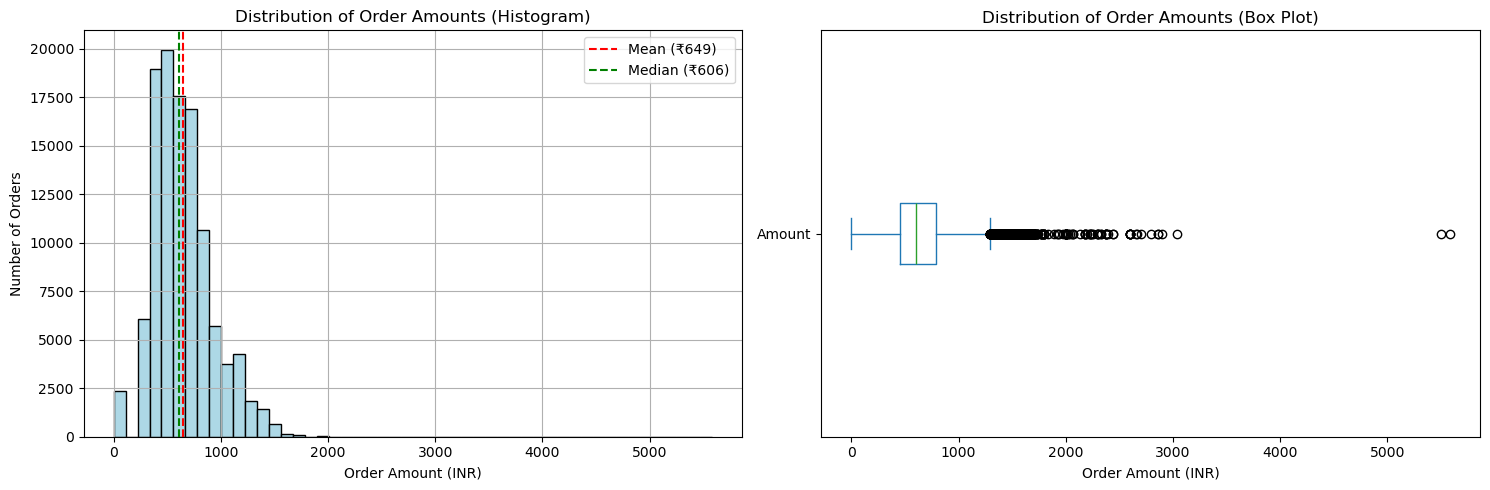

In [9]:
# Create a figure with two charts side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Chart 1: Histogram (Shows the distribution of prices)
df_clean['Amount'].hist(bins=50, ax=ax1, edgecolor='black', color='lightblue')
ax1.set_title('Distribution of Order Amounts (Histogram)')
ax1.set_xlabel('Order Amount (INR)')
ax1.set_ylabel('Number of Orders')
# Add a vertical line at the mean and median
ax1.axvline(df_clean['Amount'].mean(), color='red', linestyle='--', label=f'Mean (₹{df_clean["Amount"].mean():.0f})')
ax1.axvline(df_clean['Amount'].median(), color='green', linestyle='--', label=f'Median (₹{df_clean["Amount"].median():.0f})')
ax1.legend()

# Chart 2: Box Plot (Shows the range and outliers)
df_clean['Amount'].plot(kind='box', vert=False, ax=ax2)
ax2.set_title('Distribution of Order Amounts (Box Plot)')
ax2.set_xlabel('Order Amount (INR)')

# Display the plots
plt.tight_layout()
plt.show()

## Task 3: Category Analysis

In [12]:
print("TOP 10 CATEGORIES BY NUMBER OF ORDERS (Popularity):")
top_categories_by_orders=df_clean['Category'].value_counts().head(10)
print(top_categories_by_orders)

print("\n TOP 10 CATEGORIES BY TOTAL REVENUE (Profitability):")
top_categories_by_revenue=df_clean.groupby('Category')['Amount'].sum().sort_values(ascending= False).head(10)
print(top_categories_by_revenue)

TOP 10 CATEGORIES BY NUMBER OF ORDERS (Popularity):
Category
Set              42947
kurta            42622
Western Dress    13378
Top               9346
Ethnic Dress      1014
Blouse             810
Bottom             380
Saree              143
Dupatta              3
Name: count, dtype: int64

 TOP 10 CATEGORIES BY TOTAL REVENUE (Profitability):
Category
Set              35731673.0
kurta            19425870.0
Western Dress    10209590.0
Top               4904066.0
Ethnic Dress       732744.0
Blouse             418389.0
Bottom             135453.0
Saree              114694.0
Dupatta               915.0
Name: Amount, dtype: float64


## Task 4: Average Price per Category

In [13]:
print("AVERAGE SELLING PRICE BY TOP CATEGORY:")
average_price_by_categpry=df_clean.groupby('Category')['Amount'].mean().sort_values(ascending=False).head(10)
print(average_price_by_categpry.round(2))

AVERAGE SELLING PRICE BY TOP CATEGORY:
Category
Set              834.01
Saree            802.06
Western Dress    763.68
Ethnic Dress     723.34
Top              525.29
Blouse           519.09
kurta            456.84
Bottom           357.40
Dupatta          305.00
Name: Amount, dtype: float64


##  Business Recommendations and Strategy

Based on the data analysis, here are the actionable strategies for launching a new product:

### **Primary Recommendation: Launch a "Set"**
-   **Why:** The "Set" category is the undisputed market leader, generating the highest revenue (₹35.7M) due to strong sales volume and a high average price point (₹835).
-   **Action:** Develop a product bundle (e.g., a top and bottom sold together) to compete in this premium, high-value segment.

### **Secondary Recommendation: Target the "Western Dress" Niche**
-   **Why:** This category offers a strong balance of good sales volume and a high average price (₹764), with less competition than the "Set" category.
-   **Action:** Consider a Western-style dress to capture customers looking for high-value individual items.

### **Pricing Strategy:**
-   **Avoid the Low-End:** Competing solely on price with "Kurtas" (avg. ₹457) may lead to a volume game with lower profits.
-   **Target the Premium Segment:** Price your product strategically between ₹750-₹850 to align with the high-value segment that drives the majority of revenue.